In [1]:
import pandas as pd
import numpy as np
import seaborn as sbn
import matplotlib.pyplot as plt
import os
from warnings import filterwarnings
filterwarnings('ignore')
os.chdir("C:/Users/omerm/OneDrive/Masaüstü/Data")

In [2]:
data=pd.read_csv("scores.csv")
data.head()

,number,days,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1,madrs2
0,condition_1,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0
1,condition_2,18,2,40-44,1.0,2.0,2.0,6-10,2.0,2.0,24.0,11.0
2,condition_3,13,1,45-49,2.0,2.0,2.0,6-10,2.0,2.0,24.0,25.0
3,condition_4,13,2,25-29,2.0,2.0,2.0,11-15,1.0,1.0,20.0,16.0
4,condition_5,13,2,50-54,2.0,2.0,2.0,11-15,2.0,2.0,26.0,26.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   number     55 non-null     object 
 1   days       55 non-null     int64  
 2   gender     55 non-null     int64  
 3   age        55 non-null     object 
 4   afftype    23 non-null     float64
 5   melanch    20 non-null     float64
 6   inpatient  23 non-null     float64
 7   edu        53 non-null     object 
 8   marriage   23 non-null     float64
 9   work       23 non-null     float64
 10  madrs1     23 non-null     float64
 11  madrs2     23 non-null     float64
dtypes: float64(7), int64(2), object(3)
memory usage: 5.3+ KB


In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
days,55.0,12.600000,2.491467,5.0,13.0,13.0,13.0,20.0
gender,55.0,1.454545,0.502519,1.0,1.0,1.0,2.0,2.0
afftype,23.0,1.739130,0.540824,1.0,1.0,2.0,2.0,3.0
melanch,20.0,1.950000,0.223607,1.0,2.0,2.0,2.0,2.0
inpatient,23.0,1.782609,0.421741,1.0,2.0,2.0,2.0,2.0
marriage,23.0,1.521739,0.510754,1.0,1.0,2.0,2.0,2.0
work,23.0,1.869565,0.344350,1.0,2.0,2.0,2.0,2.0
madrs1,23.0,22.739130,4.797892,13.0,18.5,24.0,26.0,29.0
madrs2,23.0,20.000000,4.729021,11.0,16.0,21.0,24.5,28.0


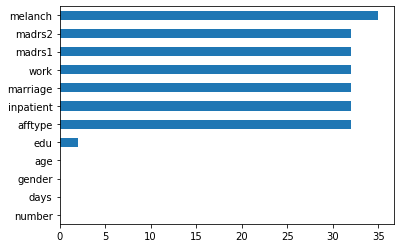

In [5]:
data.isnull().sum().sort_values().plot.barh();

In [6]:
data.columns

Index(['number', 'days', 'gender', 'age', 'afftype', 'melanch', 'inpatient',
       'edu', 'marriage', 'work', 'madrs1', 'madrs2'],
      dtype='object')

Text(0, 0.5, 'cinsiyetler (1 k, 2 e)')

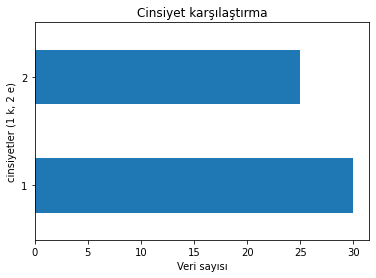

In [7]:
data["gender"].value_counts().plot.barh();
plt.title("Cinsiyet karşılaştırma")
plt.xlabel("Veri sayısı")
plt.ylabel("cinsiyetler (1 k, 2 e)")

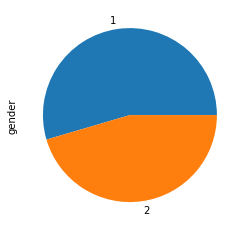

In [8]:
data["gender"].value_counts().plot.pie();

##  Condition sınıfının cinsiyet karşılaştırılması

Text(0, 0.5, 'cinsiyetler (1 k, 2 e)')

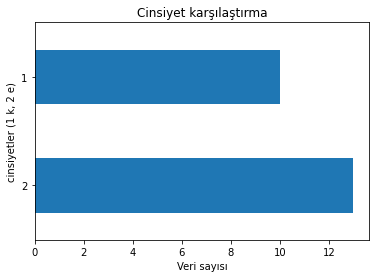

In [9]:
data.iloc[:23]["gender"].value_counts().plot.barh();
plt.title("Cinsiyet karşılaştırma")
plt.xlabel("Veri sayısı")
plt.ylabel("cinsiyetler (1 k, 2 e)")

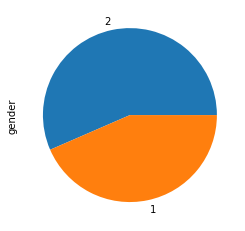

In [10]:
data.iloc[:23]["gender"].value_counts().plot.pie();

## Control grubunun cinsiyet karşılaştırılması

Text(0, 0.5, 'cinsiyetler (1 k, 2 e)')

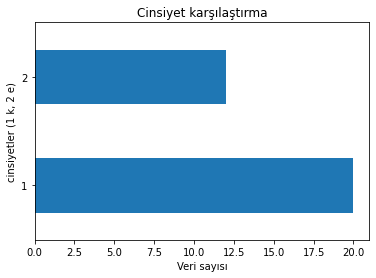

In [11]:
data.iloc[23:]["gender"].value_counts().plot.barh();
plt.title("Cinsiyet karşılaştırma")
plt.xlabel("Veri sayısı")
plt.ylabel("cinsiyetler (1 k, 2 e)")

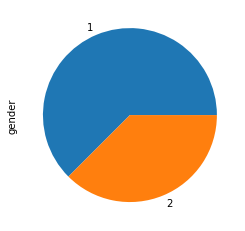

In [12]:
data.iloc[23:]["gender"].value_counts().plot.pie();

## tedavi sonuçlarını birbirinden çıkarıp etkilerine bakalım

In [13]:
data["madrs3"]=data["madrs1"]-data["madrs2"]

## Çıkan sonuçlara acaba gün sayısı etki ediyor mu ?

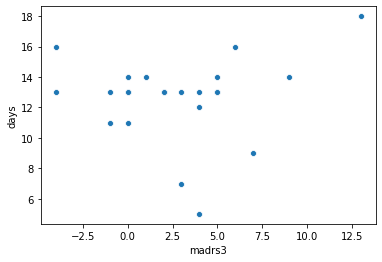

In [14]:
sbn.scatterplot(x="madrs3",y="days",data=data)

#### Gün arttıkça tedavinin olumlu yanıtlar verdiği söylenebilir

## acaba cinsiyetler tedavi sürecinde etkili mi ?

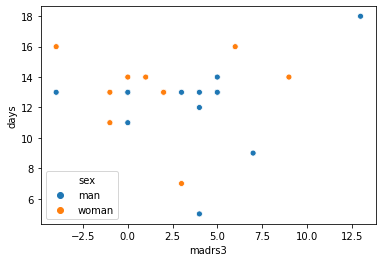

In [15]:
sex=["man" if i==2 else "woman" for i in data.gender]
data["sex"]=sex
sbn.scatterplot(x="madrs3",y="days",hue="sex",data=data)

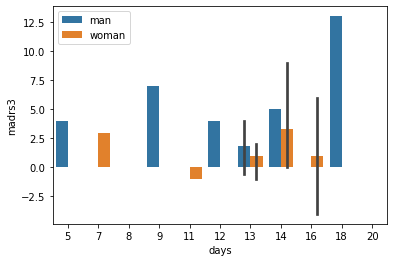

In [16]:
sbn.barplot(x="days",y="madrs3",hue="sex",data=data);
plt.legend(loc=2)

## Yaş aralığına göre hastalık görülme durumu

Text(0, 0.5, 'hastalık görülme sayısı')

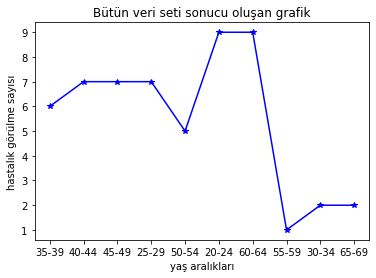

In [17]:
plt.plot(data["age"].unique(),data.groupby("age")["gender"].count(),"b-*")
plt.title("Bütün veri seti sonucu oluşan grafik")
plt.xlabel("yaş aralıkları")
plt.ylabel("hastalık görülme sayısı")

##### conditional ve control grubunun ayrı ayrı analiz edilmesi

Text(0, 0.5, 'hastalık görülme sayısı')

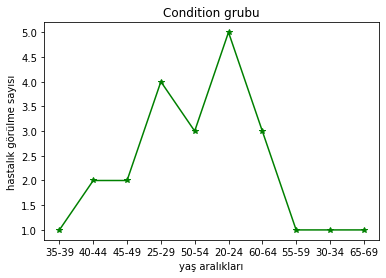

In [18]:
plt.plot(data.iloc[:23]["age"].unique(),data.iloc[:23].groupby("age")["gender"].count(),"g-*")
plt.title("Condition grubu")
plt.xlabel("yaş aralıkları")
plt.ylabel("hastalık görülme sayısı")

Text(0, 0.5, 'hastalık görülme sayısı')

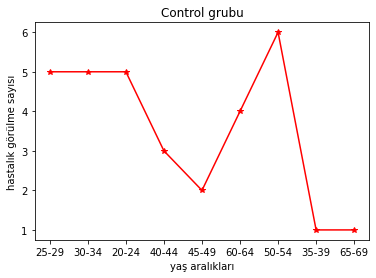

In [19]:
plt.plot(data.iloc[23:]["age"].unique(),data.iloc[23:].groupby("age")["gender"].count(),"r-*")
plt.title("Control grubu")
plt.xlabel("yaş aralıkları")
plt.ylabel("hastalık görülme sayısı")

## Yaş aralıklarının cinsiyetlere göre dağılımı

Text(0.5, 1.0, 'Yaş aralıklarının cinsiyetlere göre dağılımı')

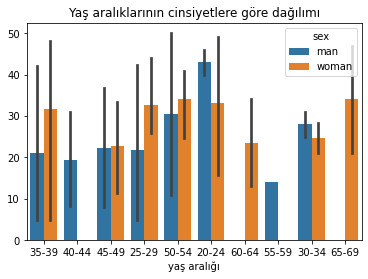

In [20]:
sbn.barplot(x="age",y=data.age.index,hue="sex",data=data);
plt.xlabel("yaş aralığı")
plt.title("Yaş aralıklarının cinsiyetlere göre dağılımı")

## madrs3 değişkeninin verilerle olan korelasyonu (sayısal ve grafiksel gösterimi)

In [21]:
data.corr()["madrs3"]

days         0.115285
gender       0.234829
afftype     -0.266129
melanch      0.057176
inpatient   -0.144067
marriage     0.361753
work         0.306609
madrs1       0.430772
madrs2      -0.402082
madrs3       1.000000
Name: madrs3, dtype: float64

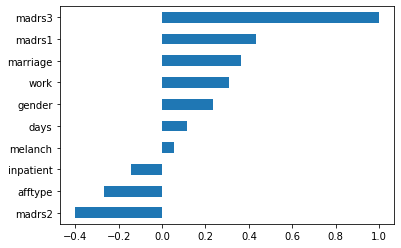

In [22]:
data.corr()["madrs3"].sort_values().plot.barh();

In [23]:
## okul 

## conditional grubu hastaların eğitim durumu dağılımı

In [24]:
data.iloc[:23]["edu"].value_counts()

6-10     12
11-15     8
16-20     2
          1
Name: edu, dtype: int64

## eğitim durumu ile hastalık orantılı mı ?

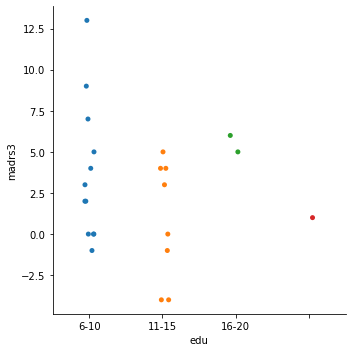

In [25]:
sbn.catplot(x="edu",y="madrs3",data=data);

#### cinsiyeti 3. boyut olarak eklersek acaba eğitim durumuyla cinsiyet arasında ilişki var mı ?

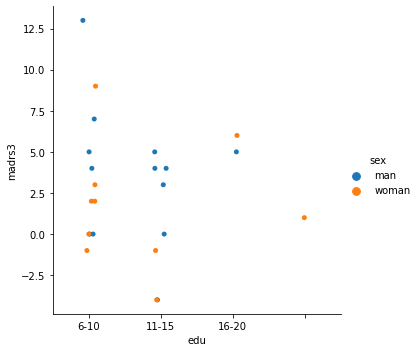

In [26]:
sbn.catplot(x="edu",y="madrs3",hue="sex",data=data);

In [27]:
## 

In [28]:
data.head()

,number,days,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1,madrs2,madrs3,sex
0,condition_1,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,0.0,man
1,condition_2,18,2,40-44,1.0,2.0,2.0,6-10,2.0,2.0,24.0,11.0,13.0,man
2,condition_3,13,1,45-49,2.0,2.0,2.0,6-10,2.0,2.0,24.0,25.0,-1.0,woman
3,condition_4,13,2,25-29,2.0,2.0,2.0,11-15,1.0,1.0,20.0,16.0,4.0,man
4,condition_5,13,2,50-54,2.0,2.0,2.0,11-15,2.0,2.0,26.0,26.0,0.0,man


In [29]:
data["cat_afftype"]=data["afftype"]

In [30]:
counter=0
for i in data[["afftype"]].values:
    if(i==1):
        data["cat_afftype"].iloc[counter]="bipolarr"
    elif(i==2):
        data["cat_afftype"].iloc[counter]="unipolar_depresif"
    elif(i==3):
        data["cat_afftype"].iloc[counter]="bipolar"
    counter+=1

In [31]:
data.head()

,number,days,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1,madrs2,madrs3,sex,cat_afftype
0,condition_1,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,0.0,man,unipolar_depresif
1,condition_2,18,2,40-44,1.0,2.0,2.0,6-10,2.0,2.0,24.0,11.0,13.0,man,bipolarr
2,condition_3,13,1,45-49,2.0,2.0,2.0,6-10,2.0,2.0,24.0,25.0,-1.0,woman,unipolar_depresif
3,condition_4,13,2,25-29,2.0,2.0,2.0,11-15,1.0,1.0,20.0,16.0,4.0,man,unipolar_depresif
4,condition_5,13,2,50-54,2.0,2.0,2.0,11-15,2.0,2.0,26.0,26.0,0.0,man,unipolar_depresif


In [32]:
data.cat_afftype=data.cat_afftype.astype(pd.CategoricalDtype())

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   number       55 non-null     object  
 1   days         55 non-null     int64   
 2   gender       55 non-null     int64   
 3   age          55 non-null     object  
 4   afftype      23 non-null     float64 
 5   melanch      20 non-null     float64 
 6   inpatient    23 non-null     float64 
 7   edu          53 non-null     object  
 8   marriage     23 non-null     float64 
 9   work         23 non-null     float64 
 10  madrs1       23 non-null     float64 
 11  madrs2       23 non-null     float64 
 12  madrs3       23 non-null     float64 
 13  sex          55 non-null     object  
 14  cat_afftype  23 non-null     category
dtypes: category(1), float64(8), int64(2), object(4)
memory usage: 6.3+ KB


In [34]:
data.cat_afftype.value_counts()

unipolar_depresif    15
bipolarr              7
bipolar               1
Name: cat_afftype, dtype: int64

In [35]:
data["afftype"].value_counts()

2.0    15
1.0     7
3.0     1
Name: afftype, dtype: int64

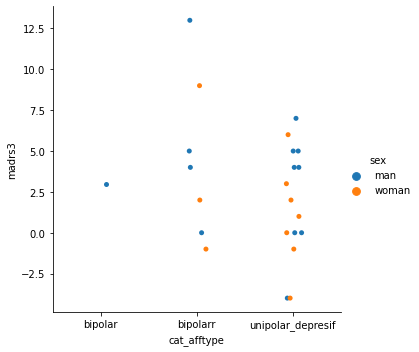

In [36]:
sbn.catplot(x="cat_afftype",y="madrs3",data=data,hue="sex");

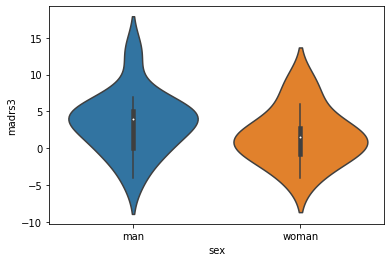

In [37]:
sbn.violinplot(x="sex",y="madrs3",data=data)

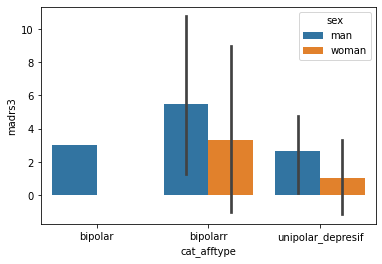

In [38]:
sbn.barplot(x="cat_afftype",y="madrs3",hue="sex",data=data)

In [39]:
data.head()

,number,days,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1,madrs2,madrs3,sex,cat_afftype
0,condition_1,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,0.0,man,unipolar_depresif
1,condition_2,18,2,40-44,1.0,2.0,2.0,6-10,2.0,2.0,24.0,11.0,13.0,man,bipolarr
2,condition_3,13,1,45-49,2.0,2.0,2.0,6-10,2.0,2.0,24.0,25.0,-1.0,woman,unipolar_depresif
3,condition_4,13,2,25-29,2.0,2.0,2.0,11-15,1.0,1.0,20.0,16.0,4.0,man,unipolar_depresif
4,condition_5,13,2,50-54,2.0,2.0,2.0,11-15,2.0,2.0,26.0,26.0,0.0,man,unipolar_depresif


# çalışmak ve evlilik durumları depresyonu tedavisi sonucunu etkiler mi ?

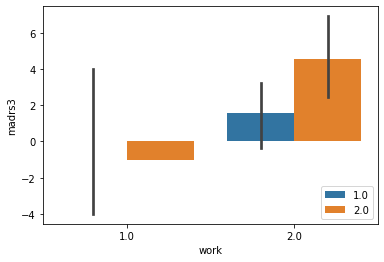

In [40]:
sbn.barplot(x="work",y="madrs3",hue="marriage",data=data)
plt.legend(loc=4)

## yaş grupları ile evlilik durumları depresyon tedavisi sonucunu etkiler mi ?

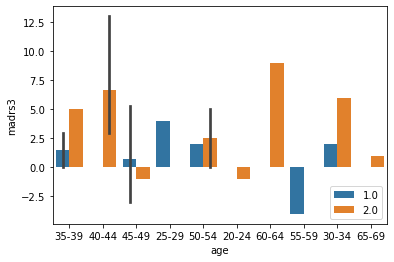

In [41]:
sbn.barplot(x="age",y="madrs3",hue="marriage",data=data)
plt.legend(loc=4)

In [42]:
data["age"]=data["age"].astype(pd.CategoricalDtype(categories=['20-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54',
       '55-59', '60-64', '65-69'],ordered=True))

In [43]:
data.age.iloc[:5]

0    35-39
1    40-44
2    45-49
3    25-29
4    50-54
Name: age, dtype: category
Categories (10, object): [20-24 < 25-29 < 30-34 < 35-39 ... 50-54 < 55-59 < 60-64 < 65-69]

In [44]:
liste=[]
for i in data.age.cat.codes:
    if(0<=i<3):
        liste.append(0)
    elif(i<5):
        liste.append(1)
    elif(i<7):
        liste.append(2)
    else: liste.append(3)
data["new_age"]=liste

## Yaşları kategorize edip bunun dağılımını ve cinsiyetin bu dağılıma etkisini inceleyelim

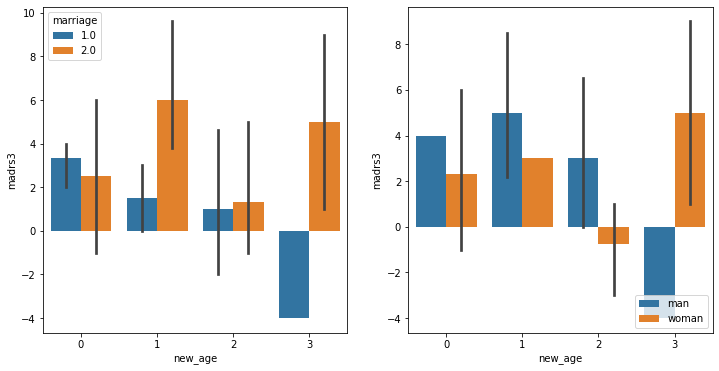

In [54]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sbn.barplot(x="new_age",y="madrs3",hue="marriage",data=data)
plt.subplot(1,2,2)
sbn.barplot(x="new_age",y="madrs3",hue="sex",data=data)
plt.legend(loc=4)

## Ayakta tedavi görmek acaba yatarak tedavi görmekten daha mı iyi sonuç veriyor ?

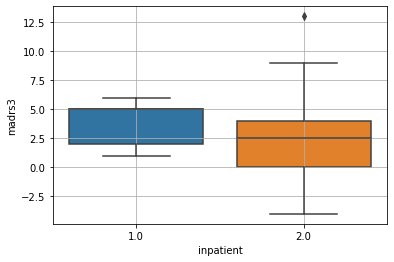

In [55]:
sbn.boxplot(x="inpatient",y="madrs3",data=data)
plt.grid()

## Acaba cinsiyet üzerinde bu ddağılım değişiyor mu ?

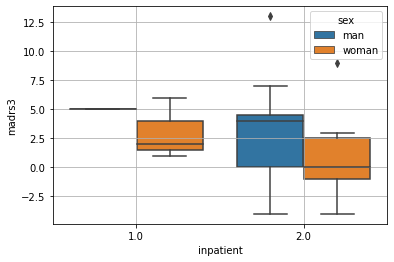

In [56]:
sbn.boxplot(hue="sex",x="inpatient",y="madrs3",data=data)
plt.grid()

## Eğitim seviyesinin tedavi yöntemine etkisinin incelenmesi

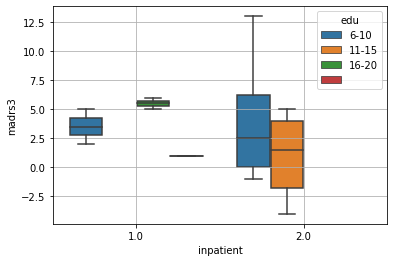

In [57]:
sbn.boxplot(hue="edu",x="inpatient",y="madrs3",data=data)
plt.grid()

## tedavi yöntemlerinin dağılımı

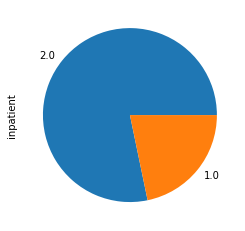

In [71]:
data["inpatient"].value_counts().plot.pie()

## Eğitim seviyesinin tedavi yöntemleri üzerine dağılımı

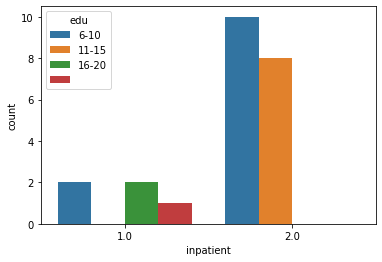

In [72]:
sbn.countplot(x="inpatient",hue="edu",data=data)

## Tedavisi olumlu oluşanların incelenmesi

In [76]:
poz_result=data[data.madrs3>0]
sta_result=data[data.madrs3==0]
neg_result=data[data.madrs3<0]

In [77]:
poz_result

,number,days,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1,madrs2,madrs3,sex,cat_afftype,new_age
1,condition_2,18,2,40-44,1.0,2.0,2.0,6-10,2.0,2.0,24.0,11.0,13.0,man,bipolarr,1
3,condition_4,13,2,25-29,2.0,2.0,2.0,11-15,1.0,1.0,20.0,16.0,4.0,man,unipolar_depresif,0
5,condition_6,7,1,35-39,2.0,2.0,2.0,6-10,1.0,2.0,18.0,15.0,3.0,woman,unipolar_depresif,1
7,condition_8,5,2,25-29,2.0,NaN,2.0,11-15,1.0,2.0,20.0,16.0,4.0,man,unipolar_depresif,0
9,condition_10,9,2,45-49,2.0,2.0,2.0,6-10,1.0,2.0,28.0,21.0,7.0,man,unipolar_depresif,2
11,condition_12,12,2,40-44,1.0,2.0,2.0,6-10,2.0,2.0,25.0,21.0,4.0,man,bipolarr,1
12,condition_13,14,2,35-39,1.0,2.0,2.0,11-15,2.0,2.0,18.0,13.0,5.0,man,bipolarr,1
13,condition_14,14,1,60-64,1.0,2.0,2.0,6-10,2.0,2.0,28.0,19.0,9.0,woman,bipolarr,3
16,condition_17,13,1,50-54,1.0,2.0,2.0,6-10,1.0,2.0,17.0,15.0,2.0,woman,bipolarr,2
17,condition_18,13,2,40-44,3.0,2.0,2.0,11-15,2.0,2.0,18.0,15.0,3.0,man,bipolar,1


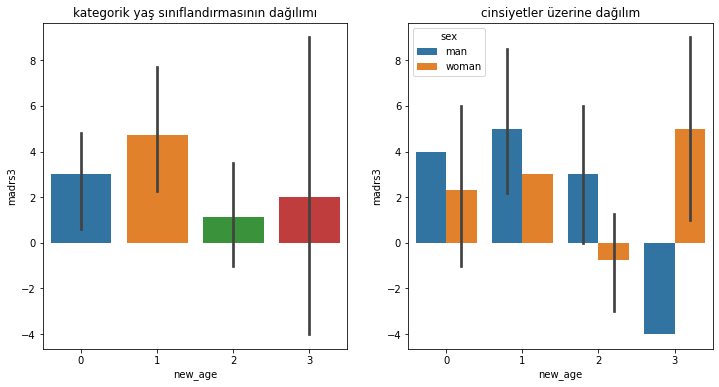

In [95]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sbn.barplot(x="new_age",y="madrs3",data=data);
plt.title("kategorik yaş sınıflandırmasının dağılımı")
plt.subplot(1,2,2)
plt.title("cinsiyetler üzerine dağılım")
sbn.barplot(x="new_age",y="madrs3",hue="sex",data=data);

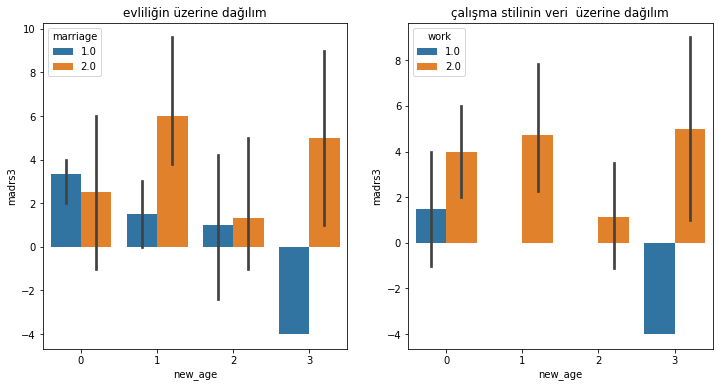

In [96]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("evliliğin üzerine dağılım")
sbn.barplot(x="new_age",y="madrs3",hue="marriage",data=data);
plt.subplot(1,2,2)
plt.title("çalışma stilinin veri  üzerine dağılım")
sbn.barplot(x="new_age",y="madrs3",hue="work",data=data);

## Stabil kalan hastaların incelenmesi

In [97]:
sta_result

,number,days,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1,madrs2,madrs3,sex,cat_afftype,new_age
0,condition_1,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,0.0,man,unipolar_depresif,1
4,condition_5,13,2,50-54,2.0,2.0,2.0,11-15,2.0,2.0,26.0,26.0,0.0,man,unipolar_depresif,2
8,condition_9,13,2,45-49,1.0,NaN,2.0,6-10,1.0,2.0,26.0,26.0,0.0,man,bipolarr,2
10,condition_11,14,1,45-49,2.0,2.0,2.0,6-10,1.0,2.0,24.0,24.0,0.0,woman,unipolar_depresif,2


## Negatif kalan hastaların incelenmesi

In [98]:
neg_result

,number,days,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1,madrs2,madrs3,sex,cat_afftype,new_age
2,condition_3,13,1,45-49,2.0,2.0,2.0,6-10,2.0,2.0,24.0,25.0,-1.0,woman,unipolar_depresif,2
6,condition_7,11,1,20-24,1.0,NaN,2.0,11-15,2.0,1.0,24.0,25.0,-1.0,woman,bipolarr,0
14,condition_15,13,2,55-59,2.0,2.0,2.0,11-15,1.0,1.0,14.0,18.0,-4.0,man,unipolar_depresif,3
15,condition_16,16,1,45-49,2.0,2.0,2.0,11-15,1.0,2.0,13.0,17.0,-4.0,woman,unipolar_depresif,2
